## 1. Installing OpenCV

In [2]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [3]:
import cv2

## 2. Testing samples (downloaded from https://opencv.org/releases/)

In [5]:
#histogram sample
!cd opencv-4.7.0/samples/python & python hist.py

 This is a sample for histogram plotting for RGB images and grayscale images for better understanding of colour distribution

Benefit : Learn how to draw histogram of images
          Get familier with cv.calcHist, cv.equalizeHist,cv.normalize and some drawing functions

Level : Beginner or Intermediate

Functions : 1) hist_curve : returns histogram of an image drawn as curves
            2) hist_lines : return histogram of an image drawn as bins ( only for grayscale images )

Usage : python hist.py <image_file>

Abid Rahman 3/14/12 debug Gary Bradski

usage : python hist.py <image_file>
 Histogram plotting 

    Keymap :

    a - show histogram for color image in curve mode 

    b - show histogram in bin mode 

    c - show equalized histogram (always in bin mode) 

    d - show histogram for gray image in curve mode 

    e - show histogram for a normalized image in curve mode 

    Esc - exit 

    
a
b
hist_lines applicable only for grayscale images
c
d
a
b
hist_lines applicable o

[ WARN:0@0.017] global samples.cpp:61 cv::samples::findFile cv::samples::findFile('lena.jpg') => 'F:\Assignments\OpenCV\opencv-4.7.0\samples\python/../..\samples/data\lena.jpg'


In [6]:
#Optical flow sample
!cd opencv-4.7.0/samples/python & python opt_flow.py


example to show optical flow

USAGE: opt_flow.py [<video_source>]

Keys:
 1 - toggle HSV flow visualization
 2 - toggle glitch

Keys:
    ESC    - exit

HSV flow visualization is on
glitch is on
Done


## 3. Read Image [ cv2.imread(img) ]

In [7]:
import cv2
import os

In [9]:
img_path = os.path.join('data','images','bike.jpg')

In [10]:
img_path

'data\\images\\bike.jpg'

In [13]:
img = cv2.imread(img_path) # reads as matrix of an image

In [14]:
img.shape

(1014, 1280, 3)

## 4. Render an Image [ using matplotlib ]

In [15]:
!pip install matplotlib

In [16]:
from matplotlib import pyplot as plt

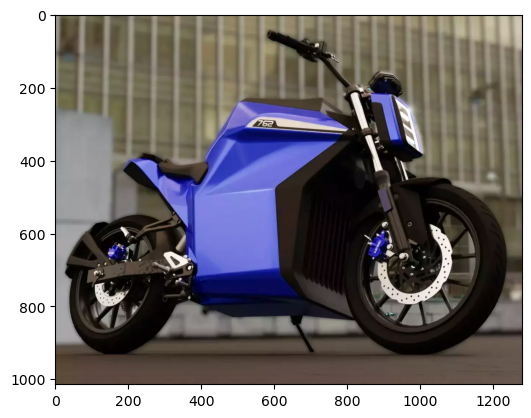

In [19]:
# Show image
plt.imshow(img) 
# Shows the image in BGR because opencv reads an image in BGR 
# to show in original format we need to convert the img to RGB

In [20]:
# converting the cv2.read(img) to RGB
recolor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

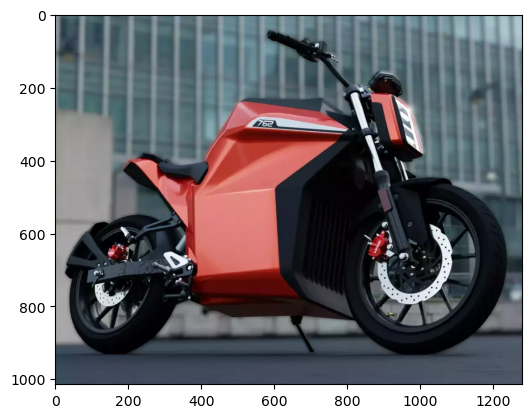

In [21]:
plt.imshow(recolor)
plt.show()

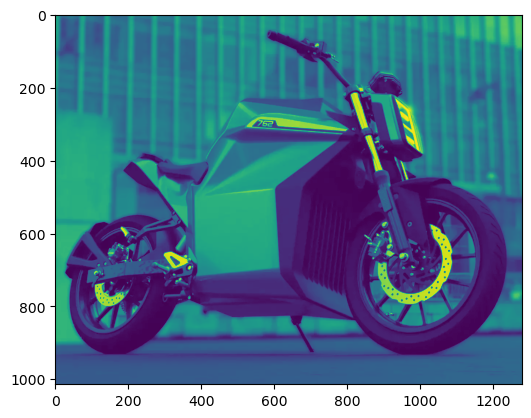

In [22]:
# recoloring the read img to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()


## 5. Writing the image (saving into a file)

In [23]:
cv2.imwrite('grayimage.jpg', gray)

True

In [26]:
output_path = os.path.join('data','images','outputgray.jpg')

In [27]:
cv2.imwrite(output_path, gray)

True

## 6. Setting up a Video Captures

In [29]:
import cv2
import os
from matplotlib import pyplot as plt

In [28]:
vid = os.path.join('data','videos','boatvideo.mp4')

In [48]:
# Setup capture to video
cap = cv2.VideoCapture(vid)

In [49]:
# Grab a frame
ret, frame = cap.read()

In [50]:
frame.shape

(720, 1280, 3)

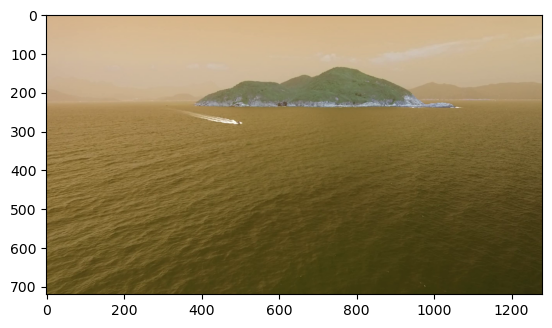

In [51]:
plt.imshow(frame)

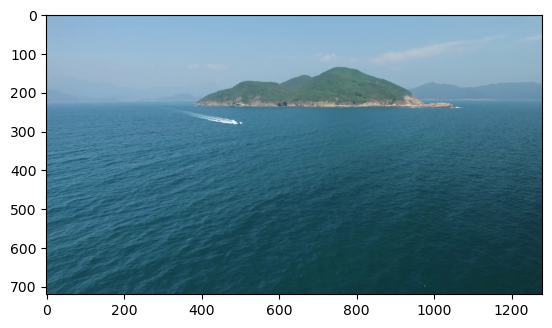

In [52]:
# recoloring and rendering the frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Release capture (disconnecting it from source)
cap.release()

## 7. Capture Properties

In [53]:
# Height
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

720.0

In [54]:
# Width
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

1280.0

In [55]:
# Get number of frames
cap.get(cv2.CAP_PROP_FRAME_COUNT)

338.0

In [56]:
# No. of frames per seconds
cap.get(cv2.CAP_PROP_FPS)

23.976023976023978

In [58]:
# Video duration in seconds
cap.get(cv2.CAP_PROP_FRAME_COUNT)/cap.get(cv2.CAP_PROP_FPS)

14.097416666666666

## 8. Working with Video Captures

In [89]:
# Release capture (disconnecting it from source)
cap.release()
cap.read()

(False, None)

In [70]:
# Establishing capture
cap = cv2.VideoCapture(os.path.join('data','videos','boatvideo.mp4'))

# Looping through each frame

for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Reads frame one by one for every loop
    ret, frame = cap.read() 
    
    # Gray transform
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Show image
    cv2.imshow('Video Player', frame) # prints every frame creates an illusion of video
    
    # Breaking out of loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## 9. Writing out Videos

In [88]:
# Establishing capture
cap = cv2.VideoCapture(os.path.join('data','videos','boatvideo.mp4'))

# Properties
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)

# Video writer
video_writer = cv2.VideoWriter(os.path.join('data','videos','output.mp4'),
                              cv2.VideoWriter_fourcc('P','I','M','1'),
                              fps,
                              (width, height),
                              isColor = False) # isColor is False to save video as gray




# Looping through each frame
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    
    # Reads frame one by one for every loop
    ret, frame = cap.read() 
    
    # Gray transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Show image
    cv2.imshow('Video Player', gray) # prints every frame creates an illusion of video
    
    # Write out frame
    video_writer.write(gray)
    
    
    # Breaking out of loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Close down everything
cap.release()
cv2.destroyAllWindows()
# Release video writer
video_writer.release()

## 10. Connecting to Webcam

In [1]:
import cv2
import os
from matplotlib import pyplot as plt

In [98]:
# Connect to capture device
cap = cv2.VideoCapture(2)

In [99]:
# Get a frame from the capture device
ret, frame = cap.read()

In [100]:
print(ret)

True


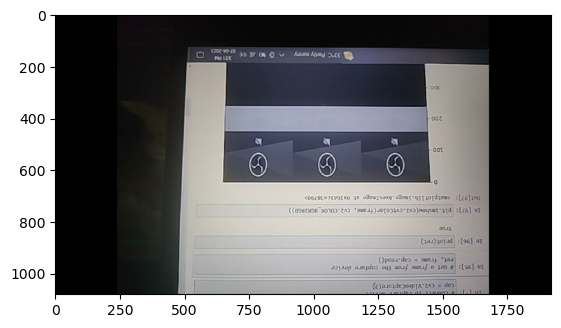

In [101]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [84]:
# Releases capture
cap.release()

In [47]:
#fuction to take photo
def take_photo():
    cap = cv2.VideoCapture(2)
    ret, frame = cap.read()
    cv2.imwrite('webcamphoto.jpg',frame)
    cap.release()

In [48]:
take_photo()

## 11. Render in Real Time (Live feed)

In [61]:
# Connect to webcam
cap = cv2.VideoCapture(1)
# Loop through every frame until we close our webcam
while cap.isOpened():
    ret, frame = cap.read()
    
    #show image
    cv2.imshow('webcam',frame)
    # Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
#releases the webcam
cap.release()
# Closes the frame
cv2.destroyAllWindows()

## 12. Edge detection

In [106]:
import cv2
import os
from matplotlib import pyplot as plt

In [104]:
#Load image
img_path = os.path.join('data','images','bike.jpg')

In [108]:
img = cv2.imread(img_path)
col_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

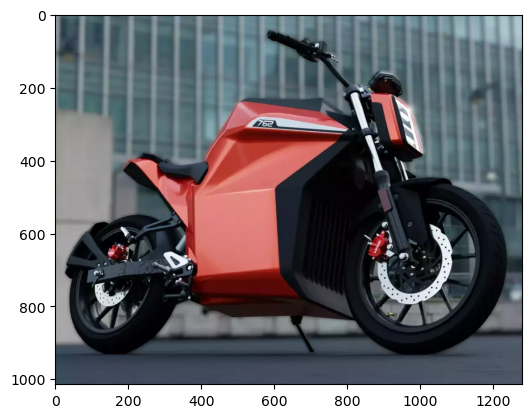

In [109]:
# View image in matplotlib
plt.imshow(col_img)

In [120]:
# View image in Opencv
resized_img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('image preview',resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [142]:
# Canny Edge Detection
blur = cv2.GaussianBlur(img, (5,5), 0) # blurring to reduce noise
canny = cv2.Canny(blur, threshold1=60, threshold2=90)

In [154]:
resized_img = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('image preview',resized_img)
cv2.imwrite('canny_edge.jpg',resized_img) #saving to show
cv2.waitKey(0)
cv2.destroyAllWindows()

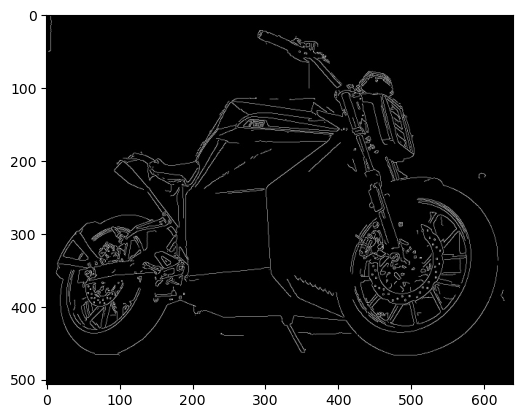

In [157]:
# Preview of edge detected image
edgeimg = cv2.imread('canny_edge.jpg')
plt.imshow(edgeimg)